In [4]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
from tensorflow.keras.utils import to_categorical

In [499]:
file = Image.open('dataset/training_samples/0/img_102.jpg')

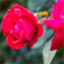

In [500]:
file

In [501]:
type(file)

PIL.JpegImagePlugin.JpegImageFile

In [502]:
np_arr = np.asarray(file)

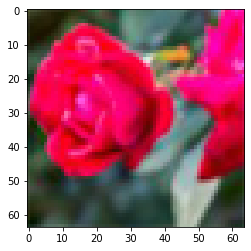

In [503]:
plt.imshow(np_arr)

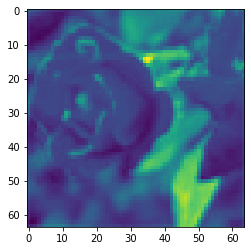

In [504]:
plt.imshow(rgb2gray(np_arr))

In [505]:
import matplotlib.gridspec as spec
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def show_img_grid(img_ids):
    plt.figure(figsize=(10, 10))
    grid = spec.GridSpec(4, 6)

    for idx, img_id in enumerate(img_ids):
        img_path = f'dataset/training_samples/0/img_{img_id}.jpg'
        print(img_path)
        image = cv.cv2.imread(img_path)
        image = cv.cv2.cvtColor(image, cv.cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

dataset/training_samples/0/img_73.jpg
dataset/training_samples/0/img_35.jpg
dataset/training_samples/0/img_87.jpg
dataset/training_samples/0/img_88.jpg
dataset/training_samples/0/img_95.jpg
dataset/training_samples/0/img_41.jpg
dataset/training_samples/0/img_99.jpg
dataset/training_samples/0/img_42.jpg
dataset/training_samples/0/img_25.jpg
dataset/training_samples/0/img_93.jpg
dataset/training_samples/0/img_46.jpg
dataset/training_samples/0/img_69.jpg
dataset/training_samples/0/img_53.jpg
dataset/training_samples/0/img_8.jpg
dataset/training_samples/0/img_47.jpg
dataset/training_samples/0/img_91.jpg
dataset/training_samples/0/img_34.jpg
dataset/training_samples/0/img_32.jpg
dataset/training_samples/0/img_63.jpg
dataset/training_samples/0/img_16.jpg
dataset/training_samples/0/img_39.jpg
dataset/training_samples/0/img_54.jpg
dataset/training_samples/0/img_66.jpg
dataset/training_samples/0/img_6.jpg


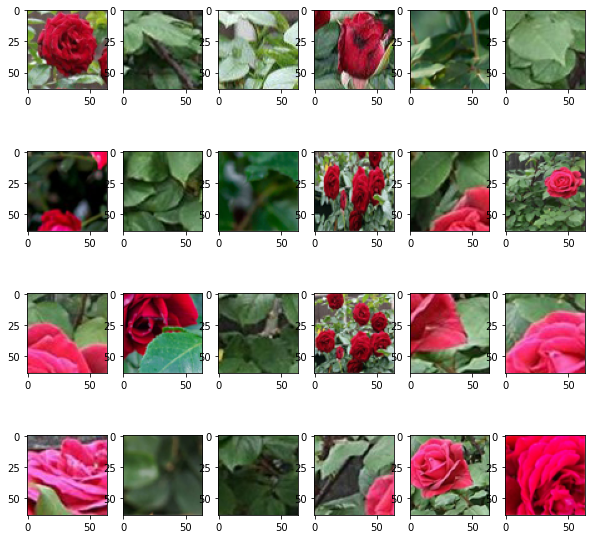

In [506]:
import random
count_list = random.sample(range(100), 24)

show_img_grid(count_list)

In [507]:
for file in os.listdir('dataset/training_samples/0/'):
    print(file)

img_0.jpg
img_1.jpg
img_10.jpg
img_100.jpg
img_101.jpg
img_102.jpg
img_103.jpg
img_104.jpg
img_105.jpg
img_106.jpg
img_107.jpg
img_108.jpg
img_109.jpg
img_11.jpg
img_110.jpg
img_111.jpg
img_112.jpg
img_113.jpg
img_114.jpg
img_115.jpg
img_116.jpg
img_117.jpg
img_118.jpg
img_119.jpg
img_12.jpg
img_120.jpg
img_121.jpg
img_122.jpg
img_123.jpg
img_124.jpg
img_125.jpg
img_126.jpg
img_127.jpg
img_128.jpg
img_129.jpg
img_13.jpg
img_130.jpg
img_131.jpg
img_132.jpg
img_133.jpg
img_134.jpg
img_135.jpg
img_136.jpg
img_137.jpg
img_138.jpg
img_139.jpg
img_14.jpg
img_140.jpg
img_141.jpg
img_142.jpg
img_143.jpg
img_144.jpg
img_145.jpg
img_146.jpg
img_147.jpg
img_148.jpg
img_149.jpg
img_15.jpg
img_150.jpg
img_151.jpg
img_152.jpg
img_153.jpg
img_154.jpg
img_155.jpg
img_156.jpg
img_157.jpg
img_158.jpg
img_159.jpg
img_16.jpg
img_160.jpg
img_161.jpg
img_17.jpg
img_18.jpg
img_19.jpg
img_2.jpg
img_20.jpg
img_21.jpg
img_22.jpg
img_23.jpg
img_24.jpg
img_25.jpg
img_26.jpg
img_27.jpg
img_28.jpg
img_29.jpg
img_3.

In [693]:
no_of_classes = 6
no_imgs = 100

In [694]:
X_train = []

for j in range(no_of_classes):
    for i, file in enumerate(os.listdir('dataset/training_samples/' + str(j))):
        if i < no_imgs:
            data = Image.open(f'dataset/training_samples/{j}/' + file)
            data = np.asarray(data)
            X_train.append(rgb2gray(data))

<ipython-input-694-df13c3fbb360>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  X_train.append(rgb2gray(data))
<ipython-input-694-df13c3fbb360>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  X_train.append(rgb2gray(data))


In [695]:
X_train = np.asarray(X_train)

In [697]:
X_train = X_train.reshape((600, 64, 64, 1))

In [698]:
y_train = []
for i in range(6):
    for j in range(100):
        y_train.append(i)

In [699]:
y_train = to_categorical(y_train)

In [700]:
y_train.shape

(600, 6)

In [701]:
X_train.shape

(600, 64, 64, 1)

In [703]:
no_test_imgs = 35

In [707]:
X_test = []
for j in range(no_of_classes):
    for i, file in enumerate(os.listdir(f'dataset/testing_samples/{j}')):
        if i < 35:
            data = Image.open(f'dataset/testing_samples/{j}/' + file)
            data = np.asarray(data)
            X_test.append(rgb2gray(data))

In [708]:
X_test = np.asarray(X_test)

In [711]:
X_test = X_test.reshape(70, 64, 64, 1)

In [712]:
Y_test = []
for i in range(no_imgs):
    Y_test.append(i)

In [713]:
Y_test = to_categorical(Y_test)

### Model implementation with Tensorflow and Keras

In [714]:
model = keras.Sequential()

In [715]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                              input_shape = (64, 64, 1)))

In [716]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [717]:
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))

In [718]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [719]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [720]:
model.add(keras.layers.MaxPool2D((2, 2)))

In [721]:
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

In [722]:
model.add(keras.layers.Flatten())

In [723]:
model.add(keras.layers.Dense(500, activation = 'relu'))

In [724]:
model.add(keras.layers.Dense(100, activation = 'relu'))

In [730]:
model.add(keras.layers.Dense(6, activation = 'softmax'))

In [731]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 4, 4, 64)        

In [732]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [733]:
tf.config.run_functions_eagerly(True)

In [735]:
history = model.fit(X_train, y_train, validation_data=(X_test, Y_test), 
                    epochs = 20, batch_size = 64)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.7297 - accuracy: 0.2850

ValueError: Data cardinality is ambiguous:
  x sizes: 70
  y sizes: 100
Make sure all arrays contain the same number of samples.

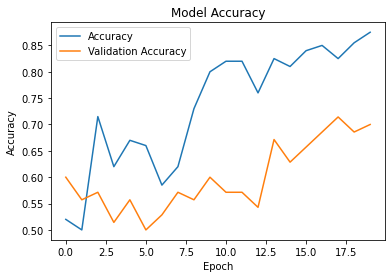

<Figure size 432x288 with 0 Axes>

In [416]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

plt.figure(1)
plt.savefig('rose_powdery_mildew.png')

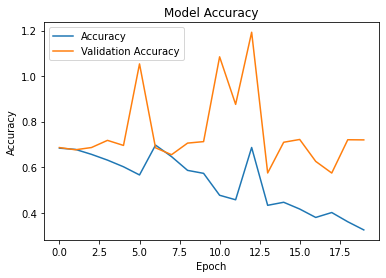

<Figure size 432x288 with 0 Axes>

In [417]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

plt.figure(1)
plt.savefig('rose_powdery_mildew.png')

In [419]:
res = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 78ms/step - loss: 0.7199 - accuracy: 0.7000


### Model saving for Flask API deployement

In [420]:
model.save("build/")

INFO:tensorflow:Assets written to: build/assets


In [421]:
model.save("flower_disease_cnn.h5")

In [478]:
new_model = keras.models.load_model("flower_disease_cnn.h5")

In [479]:
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 64)         

array([[0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

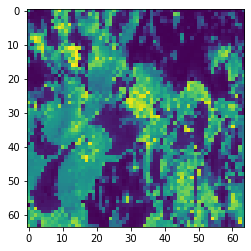

In [480]:

import numpy as np
from keras.preprocessing import image

predict_image = image.load_img('C:/Users/BLiyanage/Downloads/rose-powdery-mildew/30.jpg', target_size=(64, 64))
predict_image = image.img_to_array(predict_image)
predicted_image = plt.imshow(rgb2gray(predict_image))
predict_image = np.expand_dims(predict_image, axis=-1)
predict_image = predict_image.reshape(-1, 64, 64,1)
new_model.predict(predict_image)

In [481]:
predicted_result = new_model.predict(predict_image)
output = predicted_result
output

array([[0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [482]:
new_model.evaluate(predict_image, predicted_result)

1/1 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [483]:
new_model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])#, 'f1_score', 'precision', 'recall', 'loss'
new_model.predict([X_test])

array([[0.8949485 , 0.10505151],
       [0.9429614 , 0.05703859],
       [0.96030456, 0.03969538],
       [0.9429614 , 0.05703859],
       [0.8629125 , 0.13708748],
       [0.95363563, 0.0463644 ],
       [0.97368014, 0.02631982],
       [0.8261257 , 0.17387436],
       [0.90851134, 0.09148866],
       [0.8427389 , 0.15726109],
       [0.9567653 , 0.04323468],
       [0.96572876, 0.03427119],
       [0.89580667, 0.10419327],
       [0.9562287 , 0.04377131],
       [0.9654656 , 0.0345344 ],
       [0.5925392 , 0.40746087],
       [0.8832053 , 0.1167947 ],
       [0.29438642, 0.70561355],
       [0.91389555, 0.08610443],
       [0.8438741 , 0.15612596],
       [0.7819088 , 0.21809119],
       [0.9765023 , 0.02349771],
       [0.92428774, 0.07571226],
       [0.54220104, 0.45779893],
       [0.9748376 , 0.02516245],
       [0.9253103 , 0.07468971],
       [0.614954  , 0.38504598],
       [0.28271717, 0.7172828 ],
       [0.09787901, 0.90212095],
       [0.7056242 , 0.29437578],
       [0.

In [484]:
# loss, accuracy, f1_score, precision, recall = new_model.evaluate(X_test, Y_test)

In [485]:
print(loss, accuracy)

0.5785118937492371 0.699999988079071


In [486]:
from sklearn.metrics import average_precision_score, accuracy_score, classification_report

In [487]:
y_preds = np.argmax(predicted_result, axis=1)
print(average_precision_score([0,1], y_preds[:2]))
print(accuracy_score([0,1], y_preds[:2]))

0.5
0.5


In [488]:
print(classification_report([0,1], y_preds[:2]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [489]:
# To draw a roc curve
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(Y_test, y_preds)
# plt.plot(fpr, label = 'fpr')
# plt.plot(tpr, label = 'tpr')
# plt.legend(fontsize=16)

In [467]:
y_preds.shape

(3,)

In [468]:
predict_image.shape

(3, 64, 64, 1)